## Set Up

In [1]:
# Set up imports
import pandas as pd
import numpy as np
import scipy.stats as stats
import sqlalchemy as sql
import matplotlib.pyplot as plt

In [2]:
# Set up dataframe from SQLite database
engine = sql.create_engine('sqlite:///db/nycedudata.db')

query1 = "SELECT * FROM Schools;"
schools_df = pd.read_sql_query(query1,engine)
query2 = "SELECT * FROM Demographics"
demo_raw = pd.read_sql_query(query2,engine)
print(set(demo_raw['demo_var']))

{'grade 6', 'grade 7', 'grade pk', 'grade 2', 'grade 1', 'grade 12', 'grade 3', 'white', 'poverty', 'grade 8', 'grade 11', 'grade 4', 'ell', 'grade 5', 'swd', 'grade 9', 'grade k', 'grade 10', 'black', 'other race', 'omic need index', 'male', 'asian', 'female', 'hispanic'}


In [ ]:
test_demo = 'white'
school_demo = 'poverty'

query_string = "SELECT Regents.test_id, Demographics.demo_id, Regents.dbn, Regents.year, Regents.exam_name, \
Regents.demo_var AS test_demo, Regents.demo_cat as test_demo_cat, Demographics.demo_var as school_demo, \
Demographics.demo_cat as school_demo_cat, \
Regents.mean_score, Regents.pct_lt_65, Regents.pct_gt_65, Regents.pct_gt_80, \
Demographics.total_enrollment, Regents.test_num, \
Demographics.demo_num as school_demo_num, Demographics.demo_pct AS school_demo_pct \
FROM Regents JOIN Demographics USING (dbn, year) \
;"               # WHERE Regents.demo_var = '{}' AND Demographics.demo_var = '{}'

demo_df_whole = pd.read_sql_query(query_string, engine)
demo_df = demo_df_whole[demo_df_whole['school_demo'] == school_demo]
demo_df = demo_df[demo_df['test_demo'] == test_demo]
demo_df = demo_df.drop(demo_df[demo_df['test_demo_cat'] == 'grade level'])

In [ ]:
print(demo_df_whole[155:165])

## Analysis

In [ ]:
x_cat = 'school_demo_pct'
y_cat = 'pct_gt_65'
title = '{}: {} || {}:{}'.format(x_cat,school_demo,y_cat,test_demo)

x_array = demo_df[x_cat]
y_array = demo_df[y_cat]

plt.scatter(demo_df[x_cat], demo_df[y_cat])
plt.xlabel(x_cat)
plt.ylabel(y_cat)
plt.title(title)
plt.show()

### Notes on test_demo/school_demo scatter plots
- Hispanic and black scatter plots (gt_65 & gt_80 for all students) have large empty areas in the top right (high hispanic or black %, high pass rate)
    - Black plot is has empty area centered around 60% black students --> better performances in high % black schools vs. mid-level % black schools
    - Hispanic plot is empty in upper corner (distinct "line" above which there are almost no schools)
    - ___Intersting bands in the black plots?___
- White 

In [6]:
m, b, r, p, std_err = stats.linregress(x_array, y_array)
print('m: {}, b: {} r: {} p: {} stderror: {}'.format(m,b,r,p,std_err))

m: -0.49090763645735563, b: 107.38285460309011 r: -0.3697771213189922 p: 3.469170410148725e-142 stderror: 0.01862929906294561


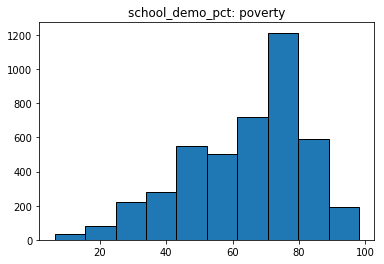

       Min        Q1          Med        Q3        Max
[ 6.41025641 50.80898358 69.16010499 77.17391304 98.06094183]


In [7]:
plt.figure()
plt.hist(demo_df[x_cat],edgecolor='black')
title = '{}: {}'.format(x_cat,school_demo)
plt.title(title)
plt.show()
print('       Min        Q1          Med        Q3        Max')
print(np.percentile(demo_df['school_demo_pct'],[0,25,50,75,100]))

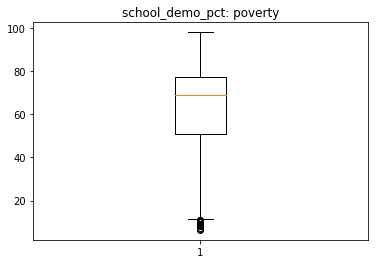

In [8]:
plt.boxplot(demo_df[x_cat])
title = '{}: {}'.format(x_cat,school_demo)
plt.title(title)
plt.show()

## Demographics notes
- Poverty % graph is a beautiful left skewed example --> 78% MEDIAN!!!

In [9]:
sub_df = demo_df[['pct_gt_65', 'school_demo_pct']]
sub_df = sub_df.sort_values('school_demo_pct')
sub_df.tail()

,pct_gt_65,school_demo_pct
2733151,62.5,98.060942
2731651,63.6,98.060942
2731401,76.2,98.060942
2732926,71.4,98.060942
2732076,33.3,98.060942


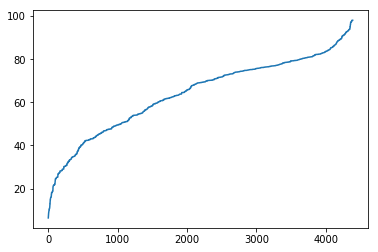

In [10]:
plt.plot(range(1,len(sub_df)+1),sub_df['school_demo_pct'])
plt.show()

In [11]:
#see demo categories
print(set(demo_df_whole['test_demo_cat']))

{'ell status', 'gender', 'ethnicity', 'swd status', 'all students'}


In [12]:
temp_df = {}

for d in set(demo_df_all[demo_df_all['test_demo_cat'] == 'ethnicity']['test_demo']):
    temp_df[d] = list(demo_df_all[demo_df_all['test_demo'] == d][y_cat])
plt.boxplot(temp_df.values(),labels=temp_df.keys())
plt.ylabel(y_cat)
plt.xticks(rotation=90)
plt.show()


NameError: name 'demo_df_all' is not defined

In [ ]:
temp_df.keys()

In [ ]:
demo_df_whole.loc[demo_df_whole['school_demo'] == 'black'][y_cat].head()